# Data Cleaning Notebook.

This notebook contains: 
- The code to read-in and clean the data for our modeling purposes.
- Basic information on the dataset.
- Basic EDA.

## <a href="https://thejk.medium.com/i-will-predict-the-2023-nba-mvp-using-machine-learning-8e7ed688b0d3">Data Source</a>:

### <a href="https://www.kaggle.com/datasets/danchyy/nba-mvp-votings-through-history?resource=download">Alternative Data Source (cleaner but not as up to date)</a>:

### <a href="https://www.basketball-reference.com/about/glossary.html">Variable Definitions</a>:

In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('/Users/wyattscott/Documents/DS5110/Project')

import seaborn as sns
import matplotlib.pyplot as plt
import shap
import pickle

import warnings
warnings.filterwarnings('ignore')


from scipy.stats import randint
from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv('mvp_data.csv')

In [3]:
df.columns

Index(['name', 'height', 'weight', 'Season', 'Age', 'Pos', 'G', 'GS', 'MP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'Rank', 'mvp_share', 'Trp Dbl',
       'conference', 'W', 'Rk_Season', 'Overall'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23057 entries, 0 to 23056
Data columns (total 58 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        23057 non-null  object 
 1   height      23057 non-null  float64
 2   weight      23054 non-null  float64
 3   Season      23057 non-null  float64
 4   Age         23057 non-null  float64
 5   Pos         23057 non-null  object 
 6   G           23057 non-null  float64
 7   GS          17766 non-null  float64
 8   MP          22699 non-null  float64
 9   FG          23057 non-null  float64
 10  FGA         23057 non-null  float64
 11  FG%         22986 non-null  float64
 12  3P          18288 non-null  float64
 13  3PA         18288 non-null  float64
 14  3P%         15541 non-null  float64
 15  2P          19690 non-null  float64
 16  2PA         19690 non-null  float64
 17  2P%         19579 non-null  float64
 18  eFG%        19622 non-null  float64
 19  FT          23057 non-nul

In [5]:
df.describe()

height        weight        Season           Age             G  \
count  23057.000000  23054.000000  23057.000000  23057.000000  23057.000000   
mean     199.516459    213.241216   1995.604892     26.505747     55.003036   
std        9.216514     26.532131     18.622294      3.932217     25.023362   
min      160.000000    133.000000   1950.000000     18.000000      1.000000   
25%      193.000000    190.000000   1983.000000     23.000000     37.000000   
50%      201.000000    215.000000   1998.000000     26.000000     64.000000   
75%      206.000000    230.000000   2011.000000     29.000000     77.000000   
max      231.000000    360.000000   2022.000000     44.000000     88.000000   

                 GS            MP            FG           FGA           FG%  \
count  17766.000000  22699.000000  23057.000000  23057.000000  22986.000000   
mean      26.096026     20.824631      3.309008      7.370295      0.436160   
std       29.420756     10.279584      2.348707      4.892170      0.092097   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000     12.300000      1.500000      3.500000      0.399000   
50%       11.000000     20.200000      2.800000      6.200000      0.441000   
75%       52.000000     29.500000      4.700000     10.400000      0.482000   
max       83.000000     48.500000     20.000000     39.500000      1.000000   

       ...          OBPM          DBPM           BPM          VORP  \
count  ...  19843.000000  19843.000000  19843.000000  19843.000000   
mean   ...     -1.439047     -0.175427     -1.614842      0.651147   
std    ...      3.836526      1.730004      4.759726      1.361247   
min    ...    -68.900000    -31.100000    -92.100000     -2.600000   
25%    ...     -3.100000     -1.000000     -3.400000     -0.100000   
50%    ...     -1.300000     -0.200000     -1.400000      0.100000   
75%    ...      0.400000      0.600000      0.500000      1.000000   
max    ...    199.400000     60.700000    242.200000     12.500000   

              Rank    mvp_share      Trp Dbl             W     Rk_Season  \
count  1023.000000  3698.000000  5055.000000  23053.000000  23057.000000   
mean      8.760508     0.039732     0.583581     39.583612     13.358026   
std       5.489211     0.140972     2.119708     12.471613      8.222792   
min       1.000000     0.000000     0.000000      7.000000      1.000000   
25%       4.000000     0.000000     0.000000     30.000000      6.000000   
50%       8.000000     0.000000     0.000000     40.000000     13.000000   
75%      12.000000     0.001000     0.000000     49.000000     20.000000   
max      30.000000     1.000000    42.000000     73.000000     30.000000   

            Overall  
count  23053.000000  
mean       0.495764  
std        0.150908  
min        0.106061  
25%        0.378049  
50%        0.500000  
75%        0.609756  
max        0.890244  

[8 rows x 55 columns]

---

# Cleaning:

One thing to consider here is that the rules change over time, for example, the minimum number of games a player must be on the court for recently changed to 65. In the code below, it's set at 65.

In [6]:
# Fill missing values
df['Rank'].fillna(0, inplace=True)
df['mvp_share'].fillna(0.0, inplace=True)
df['Trp Dbl'].fillna(0, inplace=True)

# Normalize Triple Double
df['Trp Dbl'] = df['Trp Dbl'] / df['G']

# Convert 'G' and 'Season' to integer type
df['G'] = df['G'].astype(int)
df['Season'] = df['Season'].astype(int)

# Filter out data based on conditions
df = df[(df['G'] > 65) & (df['Season'] <= 2022)]

# Ranking Conference
df['Rk_Conference'] = df.groupby(['Season', 'conference'])['W'].rank("dense", ascending=False) + df['Rk_Season']
df['Rk_Conference'] = df.groupby(['Season', 'conference'])['Rk_Conference'].rank("dense", ascending=True)

# Save cleaned data to CSV
df.drop(columns=['conference', 'W'], inplace=True)

# Sort out seasons we'll use for testing/predictions
df.sort_values(by=['Season'], ascending=False, inplace=True)
df_last = df[df['Season'] > (2022 - 5)] 
last_names = df_last['name'].values
last_seasons = df_last['Season'].values
del df_last['name']
del df_last['Season']
del df_last['Rank']
del df_last['mvp_share']

# Filter for seasons older than 5 years
df = df[df['Season'] <= (2022 - 5)].copy()
df.drop(columns=['name'], inplace=True)

In [7]:
df.head()

height  weight  Season   Age Pos   G    GS    MP   FG   FGA  ...  OBPM  \
7625    190.0   215.0    2017  28.0  SG  75  15.0  31.0  5.5  13.5  ...   1.3   
7307    203.0   220.0    2017  26.0  SF  75  75.0  35.9  8.3  18.0  ...   3.0   
16168   190.0   195.0    2017  22.0  PG  82  58.0  29.4  5.2  11.1  ...   0.8   
7645    211.0   240.0    2017  32.0   C  82  82.0  31.2  4.8   8.2  ...  -0.3   
6773    201.0   205.0    2017  24.0  SG  68  66.0  32.9  6.0  13.7  ...  -0.2   

       DBPM  BPM  VORP  Rank  mvp_share   Trp Dbl  Rk_Season   Overall  \
7625   -1.4 -0.1   1.1   0.0        0.0  0.000000          3  0.670732   
7307    0.1  3.1   3.4   0.0        0.0  0.000000         13  0.512195   
16168   0.0  0.8   1.7   0.0        0.0  0.060976         26  0.353659   
7645   -0.5 -0.8   0.8   0.0        0.0  0.000000          9  0.597561   
6773   -1.1 -1.3   0.4   0.0        0.0  0.000000         26  0.353659   

       Rk_Conference  
7625             3.0  
7307             6.0  
16168           13.0  
7645             4.0  
6773            13.0  

[5 rows x 56 columns]

In [8]:
last_names = pd.DataFrame(last_names, columns=['name'])
last_seasons = pd.DataFrame(last_seasons, columns=['Season'])
last_names.to_csv('last_names.csv', index=False)
last_seasons.to_csv('last_seasons.csv', index=False)

In [9]:
df.isnull().sum()

height              0
weight              0
Season              0
Age                 0
Pos                 0
G                   0
GS               3070
MP                 87
FG                  0
FGA                 0
FG%                 0
3P               2755
3PA              2755
3P%              3284
2P               1822
2PA              1822
2P%              1822
eFG%             1822
FT                  0
FTA                 0
FT%                 0
ORB              1800
DRB              1800
TRB                44
AST                 0
STL              1800
BLK              1800
TOV              2397
PF                  0
PTS                 0
PER                87
TS%                 0
3PAr             2755
FTr                 0
ORB%             1800
DRB%             1800
TRB%             1409
AST%              872
STL%             1800
BLK%             1800
TOV%             2397
USG%             2397
OWS                 0
DWS                 0
WS                  0
WS/48     

### There are a lot of missing values, so we must further clean and investigate. 

Three-point shots weren't introduced until 1979-80, and there are a lot of missing values before then, so we drop any season < 1980.

In [10]:
df = df[df['Season'] >= 1980]
df.drop(['Season'], axis="columns", inplace=True)

In [11]:
label_col_name = "mvp_share"
labels = df.pop(label_col_name)
stratify = df.pop("Rank")

In [12]:
df.columns

Index(['height', 'weight', 'Age', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'Trp Dbl', 'Rk_Season', 'Overall', 'Rk_Conference'],
      dtype='object')

In [13]:
df.isnull().sum()

height             0
weight             0
Age                0
Pos                0
G                  0
GS               335
MP                 0
FG                 0
FGA                0
FG%                0
3P                 0
3PA                0
3P%              529
2P                 0
2PA                0
2P%                0
eFG%               0
FT                 0
FTA                0
FT%                0
ORB                0
DRB                0
TRB                0
AST                0
STL                0
BLK                0
TOV                0
PF                 0
PTS                0
PER                0
TS%                0
3PAr               0
FTr                0
ORB%               0
DRB%               0
TRB%               0
AST%               0
STL%               0
BLK%               0
TOV%               0
USG%               0
OWS                0
DWS                0
WS                 0
WS/48              0
OBPM               0
DBPM               0
BPM          

In [15]:
df.shape

(7329, 53)

## There are still some null values: 
* 529 3P% (3-point percent)
* 335 for GS (games started)

We create a separate dataframe and fill these missing values with 0 for now, but we revisit this later.

In [14]:
df_corr = df.copy()
df_corr.fillna(0, inplace=True)
# Drop position column for corrplot below
df_corr.drop(['Pos'], axis="columns", inplace=True)

# EDA 

### `Pandas_Profiling`

If you want this to run faster, set `minimal=True`

In [ ]:
profile = ProfileReport(df, 
                        title='Pandas Profiling Report',
                        html={'style':{'full_width':True}},
                       minimal=True)
profile.to_notebook_iframe()

### sns `Corrplot`

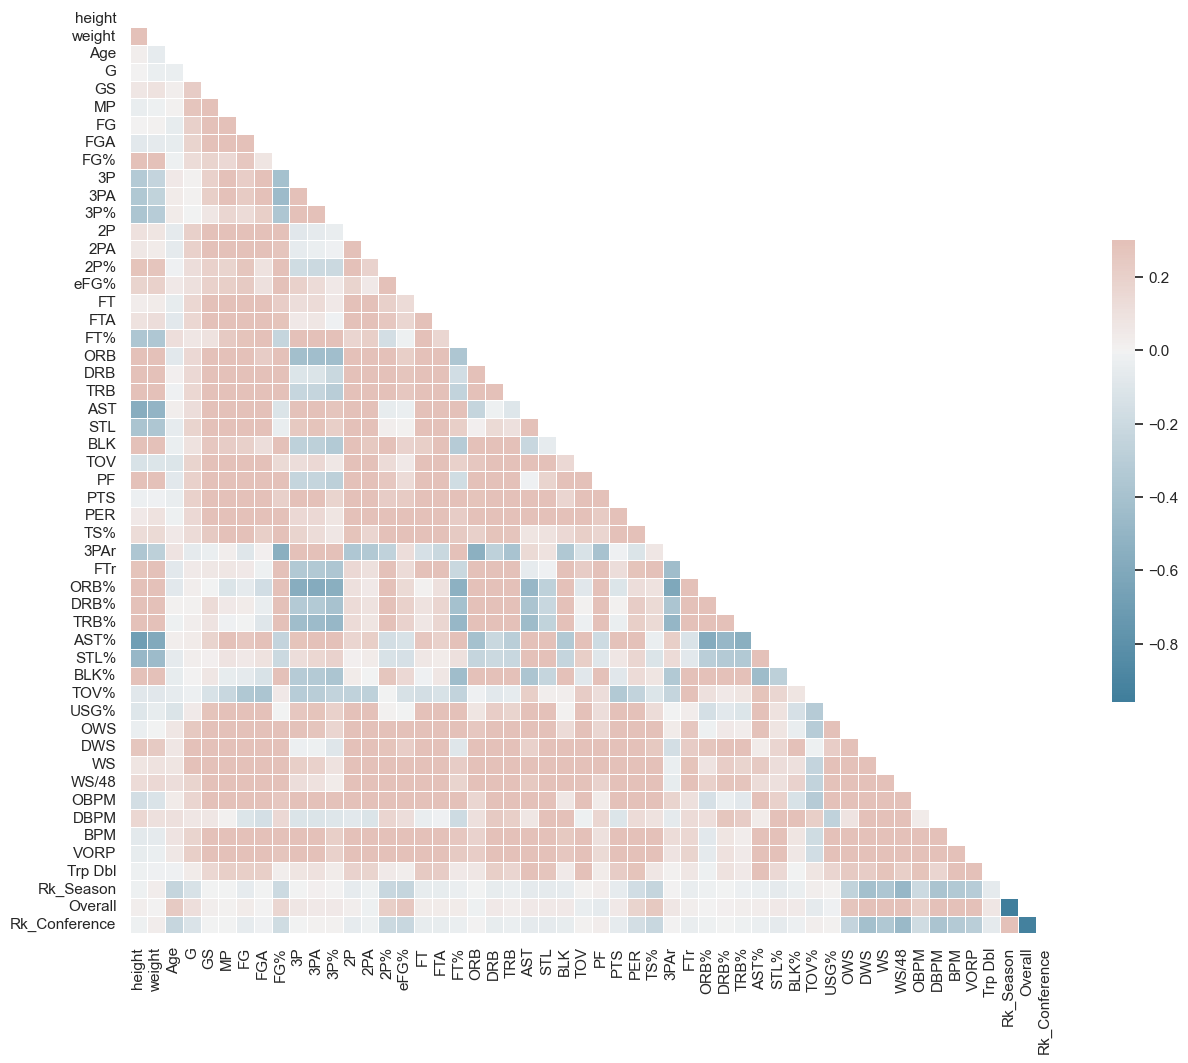

In [12]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df_corr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()